<a href="https://colab.research.google.com/github/sunandhini96/TSAI_ERAV1/blob/main/Session_20/inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -q --upgrade transformers==4.25.1 diffusers ftfy accelerate gradio

In [7]:
!git clone https://github.com/sunandhini96/TSAI_ERAV1.git

fatal: destination path 'TSAI_ERAV1' already exists and is not an empty directory.


In [ ]:
#torch_device="cpu"

In [8]:
cd /content/TSAI_ERAV1/Session_20

/content/TSAI_ERAV1/Session_20


In [9]:
!python utils.py

2023-10-23 02:05:18.991574: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 02:05:22.398533: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.9.self_attn.k_proj.bias', 'vision_model.encoder.layers.16.self_attn.k_proj.bias', 'vision_model.encoder.layers.16.self_attn.out_proj.weight', 'vision_model.encoder.layers.22.layer_norm1.weight', 'vision_model.encoder.layers.8.self_attn.out_proj.weight', 'vision_model.encoder.layers.3.self_attn.q_proj.weight', 'vision_model.encoder.layers.6.self_attn.out_proj.bias', 'vision_model.encoder.layers.20.layer_norm1.weigh

In [10]:
!python stablediffusion.py

2023-10-23 02:05:45.576857: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 02:05:46.668149: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.15.self_attn.v_proj.weight', 'vision_model.encoder.layers.1.self_attn.k_proj.bias', 'vision_model.encoder.layers.17.mlp.fc1.weight', 'vision_model.encoder.layers.4.self_attn.out_proj.weight', 'vision_model.encoder.layers.16.self_attn.q_proj.bias', 'vision_model.encoder.layers.1.self_attn.v_proj.weight', 'vision_model.encoder.layers.19.layer_norm1.bias', 'vision_model.encoder.layers.16.self_attn.q_proj.weight', 'vi

## Loading the models

This code (and that in the next section) comes from the [Huggingface example notebook](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb).

This will download and set up the relevant models and components we'll be using. Let's just run this for now and move on to the next section to check that it all works before diving deeper.

If you've loaded a pipeline, you can also access these components using `pipe.unet`, `pipe.vae` and so on.

In this notebook we aren't doing any memory-saving tricks - if you find yourself running out of GPU RAM, look at the pipeline code for inspiration with things like attention slicing, switching to half precision (fp16), keeping the VAE on the CPU and other modifications.

In [11]:
from base64 import b64encode
from utils import *
from device import torch_device,vae,text_encoder,unet,tokenizer,scheduler,token_emb_layer,pos_emb_layer,position_embeddings
import numpy
import torch
from diffusers import AutoencoderKL, LMSDiscreteScheduler, UNet2DConditionModel
from huggingface_hub import notebook_login
import gradio as gr
import random
import torch
import pathlib


# For video display:
from IPython.display import HTML
from matplotlib import pyplot as plt
from pathlib import Path
from PIL import Image
from torch import autocast
from torchvision import transforms as tfms
from tqdm.auto import tqdm
from transformers import CLIPTextModel, CLIPTokenizer, logging
import os
import shutil


Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.18.mlp.fc1.weight', 'vision_model.encoder.layers.9.self_attn.q_proj.bias', 'vision_model.encoder.layers.4.layer_norm1.weight', 'vision_model.encoder.layers.17.layer_norm1.weight', 'vision_model.encoder.layers.15.layer_norm1.bias', 'vision_model.encoder.layers.3.mlp.fc1.weight', 'vision_model.encoder.layers.3.self_attn.k_proj.bias', 'vision_model.encoder.layers.13.layer_norm2.weight', 'vision_model.encoder.layers.16.self_attn.out_proj.bias', 'vision_model.encoder.layers.1.self_attn.out_proj.bias', 'vision_model.encoder.layers.17.mlp.fc2.bias', 'vision_model.encoder.layers.16.layer_norm2.weight', 'vision_model.encoder.layers.7.layer_norm2.weight', 'vision_model.encoder.layers.8.self_attn.k_proj.bias', 'vision_model.encoder.layers.6.layer_norm2.bias', 'vision_model.encoder.layers.10.self_attn.k_proj.bias', 'vision_model.encoder.layers.20.self_a

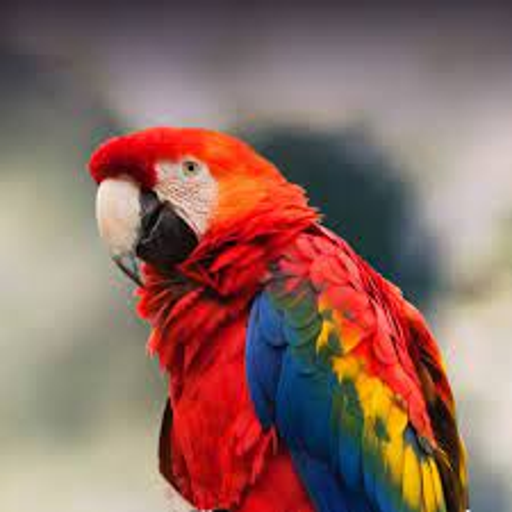

In [12]:
# Load the image with PIL
input_image = Image.open("/content/download (1).jpg").resize((512, 512))
input_image

In [13]:
from stablediffusion import *

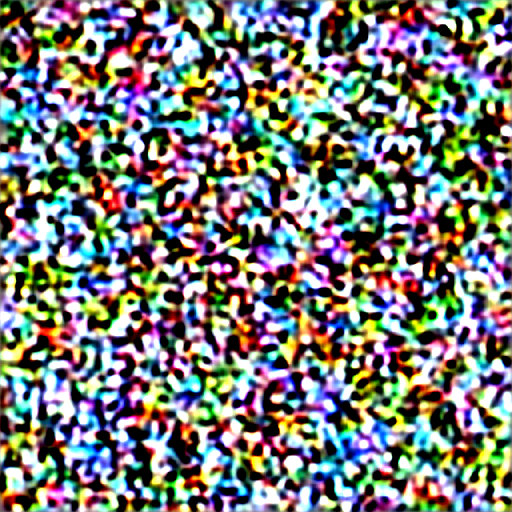

In [14]:
generate_distorted_image(input_image,vae)

In [15]:
import gradio as gr
import random
import torch
import pathlib



In [16]:

path="/content/sample_data/Project/concept_styles"
concept_styles={
    "cubex":"cubex.bin",
    "hours-style":"hours-style.bin",
    "orange-jacket":"orange-jacket.bin",
    "party-girl":"party-girl.bin",
    "xyz":"xyz.bin"

}


def generate(prompt, styles,num_inference_steps, loss_scale,noised_image):
    lossless_images, lossy_images = [], []
    for style in styles:
        concept_lib_path = f"{path}/{concept_styles[style]}"
        concept_lib = pathlib.Path(concept_lib_path)
        concept_embed = torch.load(concept_lib)

        manual_seed = random.randint(0, 100)

        generated_image_lossless = generate_image(prompt,concept_embed,num_inference_steps=num_inference_steps,color_postprocessing=False,noised_image=noised_image,loss_scale=loss_scale,seed=manual_seed
        )
        generated_image_lossy = generate_image(prompt,concept_embed,num_inference_steps=num_inference_steps,color_postprocessing=True,noised_image=noised_image,loss_scale=loss_scale,seed=manual_seed
        )
        lossless_images.append((generated_image_lossless, style))
        lossy_images.append((generated_image_lossy, style))
    return {lossless_gallery: lossless_images,lossy_gallery: lossy_images}





In [27]:
with gr.Blocks() as app:
    gr.Markdown("## ERA V1 Session20 - Stable Diffusion Model: Generative Art with Guidance")
    with gr.Row():
        with gr.Column():
            prompt_box = gr.Textbox(label="Prompt", interactive=True)
            style_selector = gr.Dropdown(
                choices=list(concept_styles.keys()),
                value=list(concept_styles.keys())[0],
                multiselect=True,
                label="Select a Concept Style",
                interactive=True,
            )
            num_inference_steps = gr.Slider(
                minimum=10,
                maximum=50,
                value=30,
                step=10,
                label="Select Number of Steps",
                interactive=True,
            )

            loss_scale = gr.Slider(
                minimum=0,
                maximum=10,
                value=8,
                step=8,
                label="Select Guidance Scale",
                interactive=True,
            )
            noised_image = gr.Checkbox(
                label="Include Noised Image",
                default=False,
                interactive=True,
            )


            submit_btn = gr.Button(value="Generate")

        with gr.Column():
            lossless_gallery = gr.Gallery(
                label="Generated Images without Guidance", show_label=True
            )
            lossy_gallery = gr.Gallery(
                label="Generated Images with Guidance", show_label=True
            )

        submit_btn.click(
            generate,
            inputs=[prompt_box, style_selector, num_inference_steps, loss_scale,noised_image],
            outputs=[lossless_gallery,lossy_gallery],
        )

app.launch()

<ipython-input-27-5fb27a148c84>:30: GradioUnusedKwargWarning: You have unused kwarg parameters in Checkbox, please remove them: {'default': False}
  noised_image = gr.Checkbox(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e89f2d0e4c863679fc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [28]:
# Make and show the progress video (change width to 1024 for full res)
!ffmpeg -v 1 -y -f image2 -framerate 12 -i /content/TSAI_ERAV1/Session_20/steps/%04d.jpeg -c:v libx264 -preset slow -qp 18 -pix_fmt yuv420p out.mp4
mp4 = open('out.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)